# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Function
def finite_difference(F, x_0, h, alpha, beta):
    
    return np.sum(alpha * F(x_0 + h * beta)) / h 
    #Calculates alpha*F(x_0+h*beta))/h for each corresponding value in alpha and beta, and then adds them.


#Verification.
def f(x):
    return np.sin(x)


x_0 = np.pi/2
h = 0.01

alpha = np.array([-1,1])
beta = np.array([0,1])

print(f'Approximated value : {finite_difference(f,x_0,h,alpha,beta)}')
print(f'Actual value: 0') #Since f'(x) = cos(x) and cos(pi/2) = 0.

Approximated value : -0.004999958333473664
Actual value: 0


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

The mimimum error for f(x) is at h = 1.519911082952933e-06
The mimimum error for g(x) is at h = 2.848035868435805e-06
The average step size for minimum error is 2.183973475694369e-06


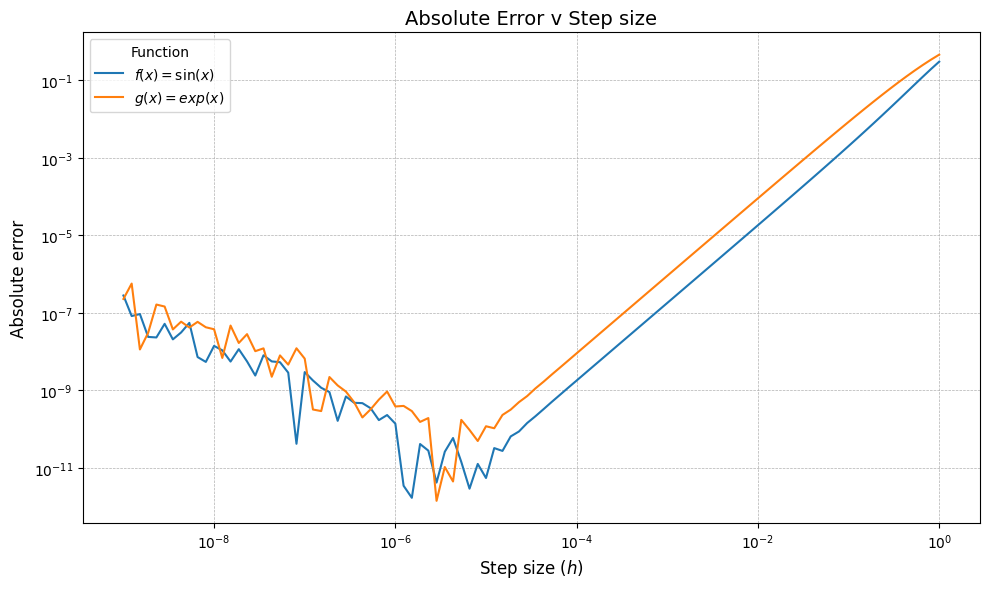

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Inputting given parameters.
M = 1/15 * np.array([
    [4, 2, -1],
    [2, 16, 2],
    [-1, 2, 4]])

A = 1/6 * np.array([
    [-3, 4, -1],
    [-4, 0, 4],
    [1, -4, 3]])

alpha = np.array([0, 0, 1]) @ np.linalg.inv(M) @ A
beta = np.array([-2, -1, 0])

#Defining functions.
def f(x):
    return np.sin(x)

def f_dash(x):
    return np.cos(x)

def g(x):
    return np.exp(x)

def g_dash(x):
    return np.exp(x)

#Preparing function parameters and empty lists.

x_0 = 1

h_list = np.logspace(-9, 0, 100)


f_errors = []

g_errors = []

min_errors = []

#Calculate error for each value of h and add it to the correspnding error list.
for h in h_list:
    f_errors.append(abs(f_dash(x_0)- finite_difference(f,x_0,h,alpha,beta)))
    g_errors.append(abs(g_dash(x_0)- finite_difference(g,x_0,h,alpha,beta)))
    
for i in range(len(h_list)):
    if f_errors[i] == min(f_errors):
        print(f'The mimimum error for f(x) is at h = {h_list[i]}')
        min_errors.append(h_list[i])

    if g_errors[i] == min(g_errors):
        print(f'The mimimum error for g(x) is at h = {h_list[i]}')
        min_errors.append(h_list[i])


#Graph error list with h values.
print(f'The average step size for minimum error is {sum(min_errors)/2}')
plt.figure(figsize=(10, 6))
plt.loglog(h_list, f_errors, label=r"$f(x) = \sin(x)$")
plt.loglog(h_list, g_errors, label=r"$g(x) = exp(x)$")
plt.xlabel("Step size ($h$)", fontsize=12)
plt.ylabel("Absolute error", fontsize=12)
plt.title("Absolute Error v Step size", fontsize=14)
plt.legend(title="Function")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()




## Discussion

In question 1, I was tasked with investigating the accuracy of a finite difference approximation for the first derivative of the form $$F'(x) = \frac{1}{h} \sum_{i=0}^{N-1} \alpha_i F(x_0 + h \beta_i)$$ for given values of $\alpha$ and $\beta$. 

In this approximation, 
* $F$- Some function
* $h$ - Step Size
* $x_0$ - A point where the derivative is to be approximated
* $\alpha$ - Weights for the approximation
* $\beta$ - Shift values

I chose to investigate the approximation accuracy by first picking some functions on which to test the approximation, $f(x) = \sin(x)$ and $g(x) = \exp(x)$. I chose these functions because I knew their derivatives, which made it easier to calculate the error in the approximation. 

Next, I created a list of h values ranging from $1 * 10^{-9}$ to $1$, log spaced apart and containing $100$ steps. These values of $h$ were each used in the finite_difference function, with either $f(x)$ or $g(x)$, and a point $x_0$, where the derivative is compared to the approximation. This is then subtracted from the actual value for the derivative and is absoluted, giving the absolute error. 

I then graphed the absolute values against their h values to see the trend they created. In the graph, the value of the error is significant at $h = 1$, because the approximation is more inaccurate for large step size. As $h$ decreases, so does our error, but at about h = $1*10^{-5}$, the consistency of the decrease in the absolute error is lost. This should not be the case meaning it must be due to **rounding errors** caused by how computers handle calculations with small decimal values.

In conclusion, small step sizes may imply a more accurate approximation usually, but when using computers for calculations, the effects of rounding errors must be considered. To get an accurate approximation, using a step size that is too big or small will result in an error. 

## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [3]:
import math

def gamma_n(n, x):
    sum = 0
    # Add code here
    if x == 0:
        y = 1/math.factorial((n+1))
        
    else:
        for k in range(n+1):
            sum = sum + x**k/math.factorial(k)
        
        y = (np.exp(x) - sum)/x**(n+1)
        
    
    return y

**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [4]:
import numpy as np

def bisection_method(F, a, b, *, tol=1e-10):
    #straight forward, simply the bisection method
    c = F(a)
    
    while abs(F(c)) >= tol:
        if F(a) * F(b) > 0:
            raise ValueError("Invalid (a, b): no sign change.")
        
        c = (a + b) / 2

        if F(a) * F(c) <= 0:
            b = c
            
        else:
            a = c
    return c

def gamma_n_inverse(n, y):
    
    # define equation f(x) = gamma(x) - y
    def f(x):
        return gamma_n(n,x) - y

    a = 0
    b = 1
    #if not root in (a,b), double b
    while f(b) <= 0:
        b *= 2
    
    #then apply method
    x = bisection_method(f,a,b,tol=1e-10)
    
    return x
    

In [5]:
def verify(a,b,num_iter):
    n_vals = list(range(0,7))
    
    #error if bad range
    if a or b < 0:
        raise ValueError("Unsuitable range")
    
    x_vals = np.linspace(a,b,num_iter)

    #for each n check that each x works with error > 0.00005
    for n in n_vals:
        for x in x_vals:
            if abs(gamma_n_inverse(n, gamma_n(n, x)) - x) > 0.00005:
                print(f'Error for n = {n} and x = {x}')

verify(0,100,200)

# Discussion

In Question 2, I was tasked with creating a function $\gamma_n ( x )$ and a function $\gamma_n^{-1} ( x )$. The inverse function takes the output of $\gamma_n ( x )$ , denoted $y$, as an input, and returns the corresponding $x$ such that $\gamma_n ( x ) = y$ .

To construct the inverse, I first needed to investigate the $\gamma_n ( x )$ function. After quickly deducing that an explicit algebraic expression for its inverse would be too difficult to derive, I opted to use a **numerical method** to solve the equation $\gamma_n ( x ) = y$ for $x$. But before choosing what method to use, I need to know the properties of $\gamma_n ( x )$.

Firstly, I noticed that $\gamma_n ( x )$ is **strictly increasing** and to check if it was continuous, I evaluated $\lim_{x \to 0} \gamma_n ( x )$. To do this I noticed that, $$\gamma_n ( x ) = \frac{R_{n+1}(x)}{x^{n+1}},$$ where $R_{n+1}(x)$ is the remainder term of the Taylor expansion of $e^x$ at order $n$.

It’s known that $$R_{n+1}(x) = \frac{e^c x^{n+1}}{(n+1)!}, \quad c \in (0, x),$$ so, $$\gamma_n ( x ) = \frac{e^c x^{n+1}}{(n+1)!x^{n+1}} = \frac{e^c}{(n+1)!},$$ and as $x \to 0$, $c \to 0$, so $$\lim_{x \to 0} \gamma_n ( x ) = \frac{e^0}{(n+1)!} = \frac{1}{(n+1)!} = \gamma_n (0),$$ so $\gamma_n (x)$ is **continuous** on $\mathbb{R}$.

Knowing that $\gamma_n ( x )$ was a strictly increasing continuous function, I concluded that the **bisection method** would be appropriate for calculating the roots of $\gamma_n ( x ) = y$ . However, the bisection method also requires that a sign change occurs over the inputted interval $[a, b]$. But since $\gamma_n ( x )$ varies depending on the value of $n$, a fixed interval may not always satisfy the sign change condition.

To address this, I set $a = 0$, since $x \geq 0$ , and set $b  = 1$. If a sign change doesn’t occur over $[0,1]$, $b$ is doubled until it does, and then the bisection method can be used as all of the necessary conditions are met. This allowed me to create the $\gamma_n^{-1}(x)$ function. 

I also chose to create a verify function, which tests the inverse over a range of $x$ values, for an inputted number of values in this range, for $n \in [0,6], n \in \mathbb{N}$. This was purely to ensure that the function was accurate.

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

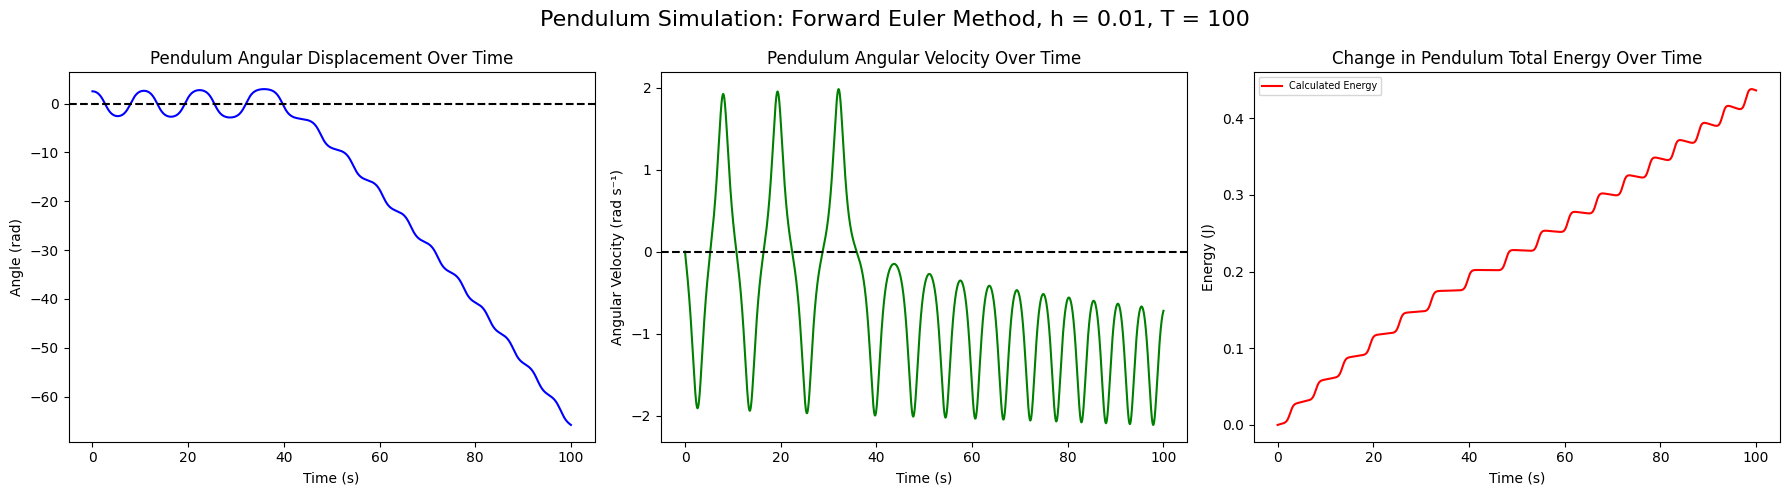

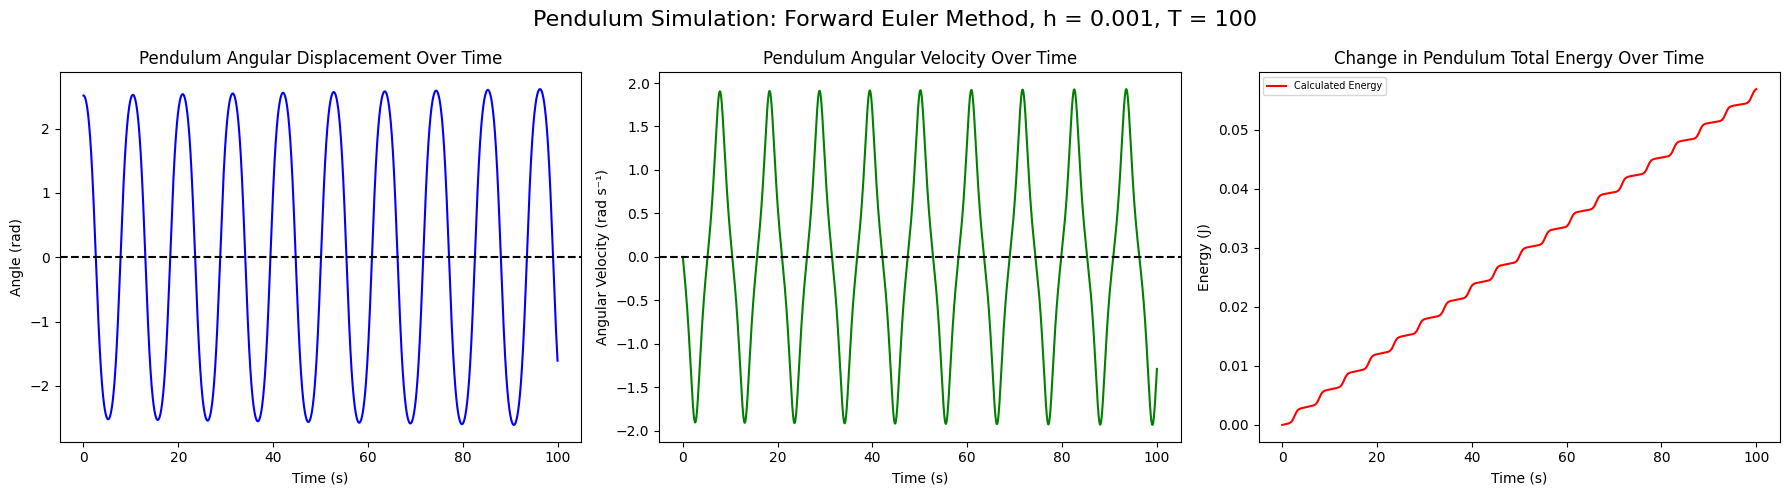

In [6]:
# Add code here
import numpy as np
import matplotlib.pyplot as plt


def forward_euler(h,T):
    
    #Initializing
    steps = int(T/h)
    t = np.arange(steps + 1) * h
    
    u = np.zeros((steps + 1,2))
    u[0] = np.array([4/5 * np.pi,0])
    
    E = np.zeros((steps + 1))
    E[0] = 0.5 * u[0,1]**2 + (1 - np.cos(u[0,0]))
    
    #Inputting given calculations 
    for n in range(steps):
        F = np.array([u[n, 1], -np.sin(u[n, 0])])
        u[n + 1] = u[n] + h * F
        E[n + 1] = 0.5 * u[n + 1, 1]**2 + (1 - np.cos(u[n + 1, 0]))
        
    #graphing
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(f'Pendulum Simulation: Forward Euler Method, h = {h}, T = {T}', fontsize=16)

    # Angular Displacement
    plt.subplot(1, 3, 1)
    plt.plot(t, u[:, 0], 'b')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title('Pendulum Angular Displacement Over Time')

    # Angular Velocity
    plt.subplot(1, 3, 2)
    plt.plot(t, u[:, 1], 'g')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad s⁻¹)')
    plt.title('Pendulum Angular Velocity Over Time')

    # Energy
    plt.subplot(1, 3, 3)
    plt.plot(t, E-E[0], 'r', label='Calculated Energy')
    plt.legend(loc='upper left', fontsize='x-small')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.title('Change in Pendulum Total Energy Over Time')

    
    plt.tight_layout()

    plt.show()


forward_euler(0.01,100)
forward_euler(0.001,100)


# Discussion

In Question 3.1, I was tasked with using the *Forward Euler* method to create a pendulum model. The Forward Euler method works as follows: 
$$
F = \begin{pmatrix}
\omega^n \\
-\sin\theta^n
\end{pmatrix}, \quad
u^n = \begin{pmatrix}
\theta^n \\
\omega^n
\end{pmatrix}
$$

$$u^{n+1} = u^n + h \cdot F$$

Where:  
- $ \theta^n $ is the angular position at time step $ n $  
- $ \omega^n $ is the angular velocity at time step $ n $ 
- $ h $ is the step size

When beginning the creation of my model, I chose to initialize two arrays, one for storing the energy and the other for storing the displacement and its rate of change. This was useful for the calculations and also for graphing the results. 

I gave the function that simulated the Forward Euler method two inputs, $h$ and $T$, The total time for which the calculations would run. This allowed me to test the method on various parameters so I could investigate it in more depth. 

I initially chose to test the method on a step length of 0.01 and a total time of 100 seconds as I wanted to investigate how the Forward Euler calculated the values with a smaller timestep. The first two graphs, begin as expected, showing oscillation in displacement and velocity. But as time goes on they both begin to stray away. In the third graph, it can be seen that the total energy of the system is **constantly increasing**, this violates the law of conservation of energy as a system cannot gain energy. 

I next chose to investigate the Forward Euler method with a step length of 0.001 but the same total time. The results in the first two graphs were much more accurate, as the discrepancy that appeared with a smaller timestep had been amended, but the total energy still showed an increase. It's worth noting that for this smaller step length, the energy at the end of the total time was much smaller than that of the larger step length, indicating how smaller step lengths minimise the total change and make the method more viable.

In summary, the Forward Euler method is **easy to implement** but is **unstable** for small timesteps and gains energy which is unphysical behavior.


**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

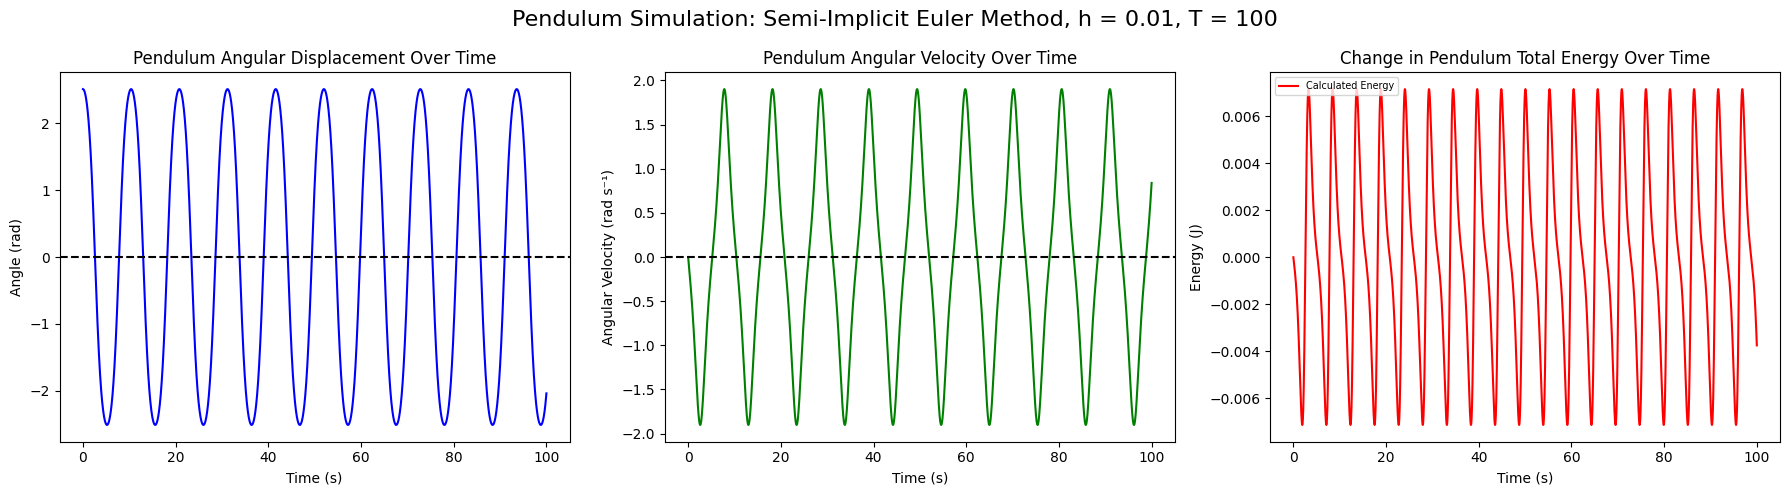

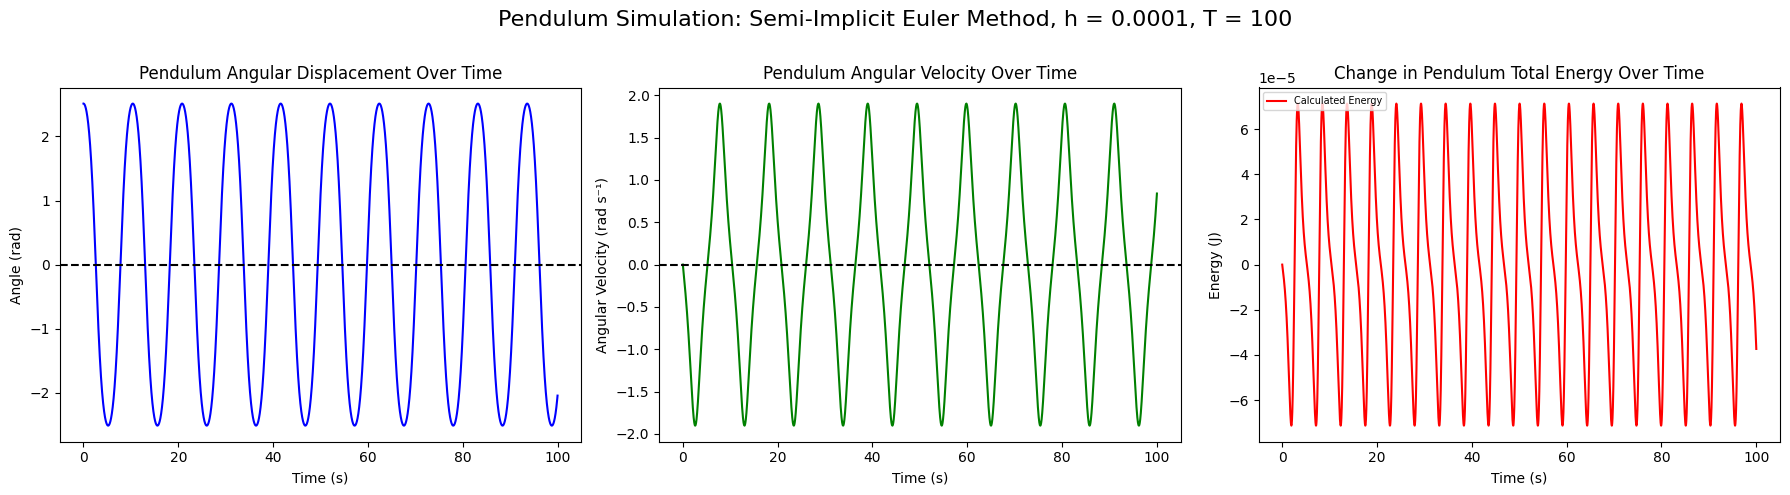

In [7]:
# Add code here

import numpy as np
import matplotlib.pyplot as plt


def semi_implicit_euler(h,T):
    
    #initialzing
    steps = int(T/h)
    t = np.arange(steps + 1) * h
    
    u = np.zeros((steps + 1,2))
    u[0] = np.array([4/5 * np.pi,0])
    
    E = np.zeros((steps + 1))
    E[0] = 0.5 * u[0,1]**2 + (1 - np.cos(u[0,0]))
    
    #given calculations
    for n in range(steps):
        u[n + 1, 1] = u[n, 1] - h * np.sin(u[n, 0])  
        u[n + 1, 0] = u[n, 0] + h * u[n + 1, 1]      
        E[n + 1] = 0.5 * u[n + 1, 1]**2 + (1 - np.cos(u[n + 1, 0]))
        
    
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(f'Pendulum Simulation: Semi-Implicit Euler Method, h = {h}, T = {T}', fontsize=16)

    # Angular Displacement
    plt.subplot(1, 3, 1)
    plt.plot(t, u[:, 0], 'b')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title('Pendulum Angular Displacement Over Time')

    # Angular Velocity
    plt.subplot(1, 3, 2)
    plt.plot(t, u[:, 1], 'g')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad s⁻¹)')
    plt.title('Pendulum Angular Velocity Over Time')

    # Energy
    plt.subplot(1, 3, 3)
    plt.plot(t, E-E[0], 'r', label='Calculated Energy')
    plt.legend(loc='upper left', fontsize='x-small')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.title('Change in Pendulum Total Energy Over Time')

    # Adjust layout before adding bottom text
    plt.tight_layout()

    plt.show()

semi_implicit_euler(0.01,100)
semi_implicit_euler(0.0001,100)



## Discussion

In Question 3.2, I was tasked with instead using the *Semi-Implicit Euler* method as a solution to the pendulum model. The Semi-Implicit Euler method works as follows: $$\omega^{n+1} = \omega^n -h\cdot\sin(\theta^n)\\ \theta^{n+1} = \theta^n + h \cdot \omega^{n+1}$$

Where all symbols denote that shown in the discussion for Question 3.1.

The way I implemented the Semi-Implicit Euler method was very similar to that of the Forward Euler, with the only change being the order in which the angular velocity and position were updated. I investigated the same parameters as in the Forward Euler case to allow for a direct comparison between the two methods.

For h = 0.01 and T = 100, the plots of angular displacement and velocity showed clear oscillatory behaviour around zero, consisted with the physical motion of a pendulum. However, the energy also oscillated which is not physically accurate as a pendulum without damping would have constant energy. 

For h = 0.001 and T = 100, at first glance, it looks as though all the graphs are identical, but there is one major change. The amplitude of the total energy graph decreases according to the step length, indicating that as $h \to 0$, the total energy becomes constant.

Overall, the Semi-Implicit Euler method gives much **more accurate** results than the Forward Euler. However it still displays **unphysical behaviour** for larger timesteps.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

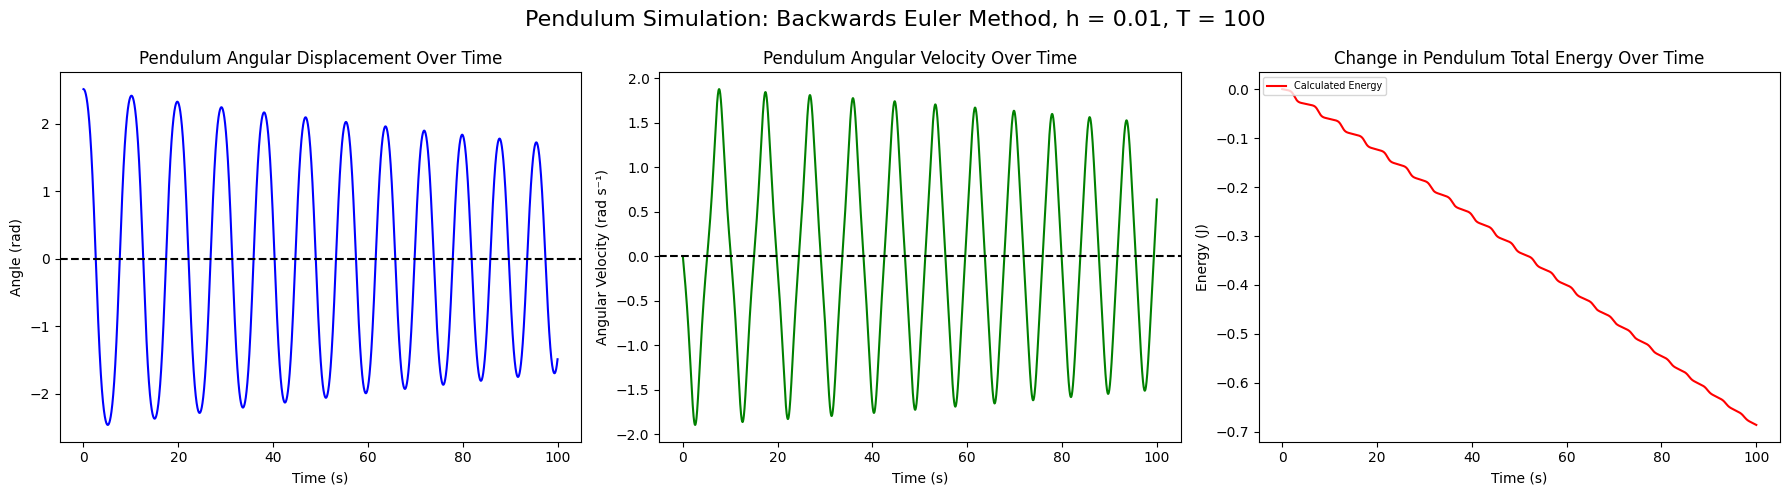

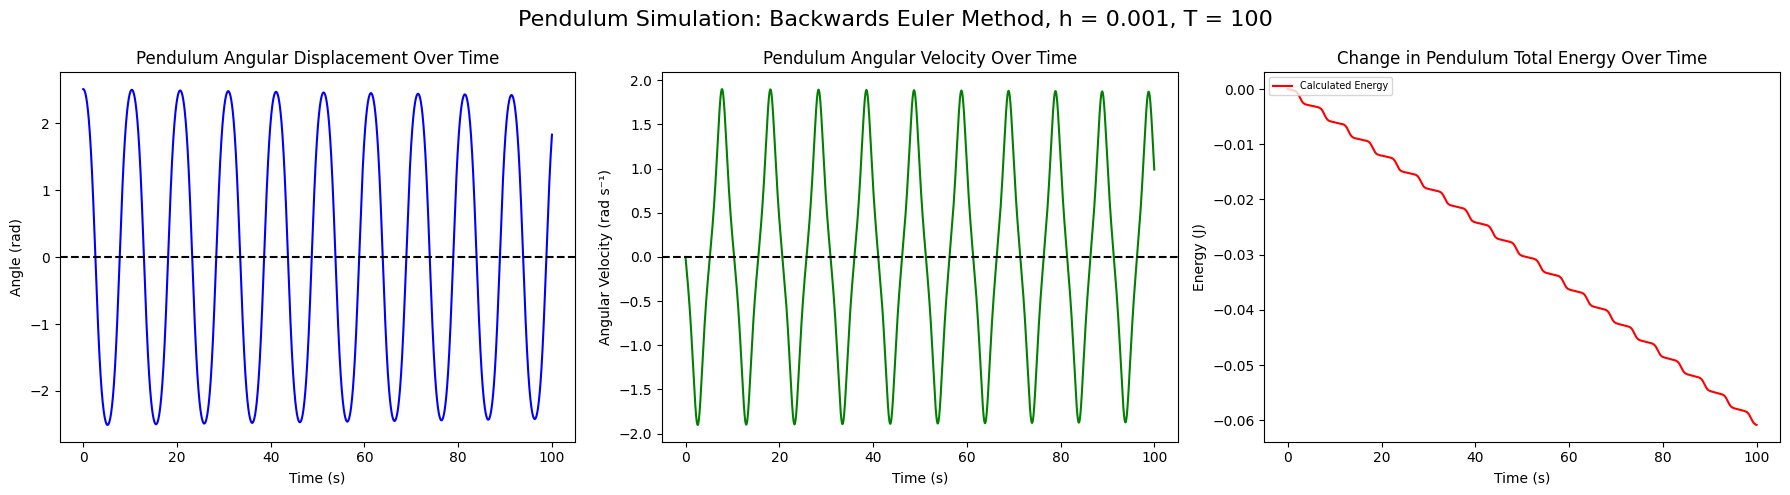

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def backward_euler(h,T):

    #initializing
    steps = int(T/h)
    t = np.arange(steps + 1) * h
    
    u = np.zeros((steps + 1,2))
    u[0] = np.array([4/5 * np.pi,0])
    
    E = np.zeros((steps + 1))
    E[0] = 0.5 * u[0,1]**2 + (1 - np.cos(u[0,0]))


    for n in range(steps):
        un1 = u[n].copy()  # initial guess

        for _ in range(100):  # do 100 iterations, this target is always reached within this number
            theta, omega = un1  

            #create G vector 
            G = np.array([
                theta - u[n, 0] - h * omega,
                omega - u[n, 1] + h * np.sin(theta)
            ])

            #Jacobian
            J = np.array([
                [1, -h],
                [h * np.cos(theta), 1]
            ])
            
            #solve delta = J * G for delta and save it
            delta = np.linalg.solve(J, -G)
            un1 += delta
            
            
            if np.linalg.norm(delta) < 1e-8:
                break

        #after condtion is met, save un1 as u[n+1] and repeat steps times
        u[n + 1] = un1
        E[n + 1] = 0.5 * un1[1]**2 + (1 - np.cos(un1[0]))

    
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(f'Pendulum Simulation: Backwards Euler Method, h = {h}, T = {T}', fontsize=16)

    # Angular Displacement
    plt.subplot(1, 3, 1)
    plt.plot(t, u[:, 0], 'b')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title('Pendulum Angular Displacement Over Time')

    # Angular Velocity
    plt.subplot(1, 3, 2)
    plt.plot(t, u[:, 1], 'g')
    plt.axhline(0, linestyle='--', color='k')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad s⁻¹)')
    plt.title('Pendulum Angular Velocity Over Time')

    # Energy
    plt.subplot(1, 3, 3)
    plt.plot(t, E-E[0], 'r', label='Calculated Energy')
    plt.legend(loc='upper left', fontsize='x-small')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.title('Change in Pendulum Total Energy Over Time')

    
    plt.tight_layout()

    plt.show()

backward_euler(0.01,100)
backward_euler(0.001,100)


## Discussion

In Question 3.3, I was tasked with using the *Backward Euler* method as a model of a pendulum. This was much more difficult than the other two methods as this required equations to be solved *implicitly* at each timestep instead of algebraically. The Backward Euler method works as follows: $$\theta^{n+1} = \theta^n + h\cdot\omega^{n+1}\\ \omega^{n+1} = \omega^n - h \cdot\sin(\theta^{n+1}),$$
forming a non-linear system. 

To solve this, I used Newton's method. This involved defining two key components, the residual function, **G**, and the Jacobian, **J**, where
$$\mathbf{G} =
\begin{pmatrix}
\theta - \theta^n - h \cdot \omega, \\
 \omega - \omega^n + h \cdot \sin(\theta)
\end{pmatrix}$$

$$\mathbf{J} = \begin{pmatrix}
1, & -h\\
h \cos(\theta), & 1
\end{pmatrix}$$

At each timestep, I performed the following Newton iteration: 
* Start with an initial guess: $(\theta,\omega) = (\theta^n,\omega^n)$
* Compute G and J
* Solve the linear system: $J \cdot \delta= G$, for $\delta$
* Update: $(\theta,\omega) = (\theta,\omega)-\delta$
* Repeat until $|\delta| < 1 \cdot 10^{-8}$

Once the solution converged, the updated values $(\theta, \omega)$ were stored as $u^{n+1}$, and the process repeated for the next time step.

The displacement and velocity graphs for the Backward Euler method display oscillation with dissipating amplitude, and the energy shows a constant decrease. This is something that is seen in actual pendulums, and damping is caused by things like friction and air resistance which make the system lose energy.

The Backwards Euler method **performed well** with both step lengths and displayed behavior that **closely matched** the physical behavior of a pendulum.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

After investigating all three numerical methods, I concluded that the **Backwards Euler** method would be best for this problem. Since the goal of the problem was to accurately simulate the motion of a pendulum, I feel that the method that displays the most *realistic* results is the one best suited for it, and it's clear that the Backwards Euler method is the only one that matches that criteria.

This is because both the Forwards and Semi-Implicit Euler methods both gain energy at some point during them, which as I said earlier, is **unphysical behavior**, and disobeys the laws of physics. But the Backwards Euler method not only doesn't gain energy but loses it, which is exactly the kind of behavior that is seen in actual pendulums. 

However, it is much more complicated and would require much more computational power for small step lengths or large total times than the other two methods. But overall I still feel that the extra complexity of the method is worth it for the similarities it shows to the pendulum.